## 1. Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import eda_helper_functions

## 2. Read the Training Date

In [2]:
import os
PROJECT_DIR = r"C:\Users\cocod\OneDrive\Desktop\fligh-sagemaker-project"
DATA_DIR = "data"


In [3]:
def get_data(name):
    file_name = f"{name}.csv"
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [4]:
train = get_data("train")

In [5]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-03-03,Delhi,Cochin,21:05:00,00:20:00,195,0.0,No Info,7673
1,Jet Airways,2019-05-01,Kolkata,Banglore,18:55:00,12:00:00,1025,1.0,In-flight meal not included,9663
2,Air India,2019-06-06,Mumbai,Hyderabad,06:20:00,07:40:00,80,0.0,No Info,3100
3,Air India,2019-05-12,Kolkata,Banglore,05:50:00,20:25:00,875,2.0,No Info,12513
4,Jet Airways,2019-04-01,Kolkata,Banglore,20:25:00,10:55:00,870,1.0,No Info,11467


In [6]:
train.shape

(640, 10)

In [7]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [8]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format='mixed')
    for col in ["date_of_journey", "dep_time", "arrival_time"]
}
)

In [9]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-03-03,Delhi,Cochin,2025-05-03 21:05:00,2025-05-03 00:20:00,195,0.0,No Info,7673
1,Jet Airways,2019-05-01,Kolkata,Banglore,2025-05-03 18:55:00,2025-05-03 12:00:00,1025,1.0,In-flight meal not included,9663
2,Air India,2019-06-06,Mumbai,Hyderabad,2025-05-03 06:20:00,2025-05-03 07:40:00,80,0.0,No Info,3100
3,Air India,2019-05-12,Kolkata,Banglore,2025-05-03 05:50:00,2025-05-03 20:25:00,875,2.0,No Info,12513
4,Jet Airways,2019-04-01,Kolkata,Banglore,2025-05-03 20:25:00,2025-05-03 10:55:00,870,1.0,No Info,11467
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-06-03,Delhi,Cochin,2025-05-03 23:30:00,2025-05-03 04:35:00,305,1.0,No Info,11378
636,Jet Airways,2019-03-24,Kolkata,Banglore,2025-05-03 21:10:00,2025-05-03 18:10:00,1260,1.0,No Info,13759
637,Multiple Carriers,2019-06-12,Delhi,Cochin,2025-05-03 10:00:00,2025-05-03 19:15:00,555,1.0,No Info,14848
638,Jet Airways,2019-06-12,Kolkata,Banglore,2025-05-03 08:25:00,2025-05-03 19:50:00,685,1.0,In-flight meal not included,9899


In [10]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High Level Summary

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [12]:
train.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
duration,640.0,637.718750,498.301920,75.0,175.0,505.0,926.25,2280.0
total_stops,640.0,0.820312,0.667061,0.0,0.0,1.0,1.00,3.0
price,640.0,9140.718750,4553.943061,1965.0,5403.0,8452.0,12386.75,46490.0


In [13]:
train.describe(include="O").T

,count,unique,top,freq
airline,640,8,Jet Airways,224
source,640,5,Delhi,260
destination,640,6,Cochin,260
additional_info,640,4,No Info,509


In [14]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,224,260,260,347.0,509


## 4. High-level analysis of Missing Values

In [15]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [19]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                      .drop(columns="price")
                                      .select_dtypes(include="number")))
    .query("outlier == -1")
    .duration
    .describe()
)

count     246.000000
mean      963.048780
std       605.069109
min        75.000000
25%       220.000000
50%      1165.000000
75%      1473.750000
max      2280.000000
Name: duration, dtype: float64

## 5. Pair Plots

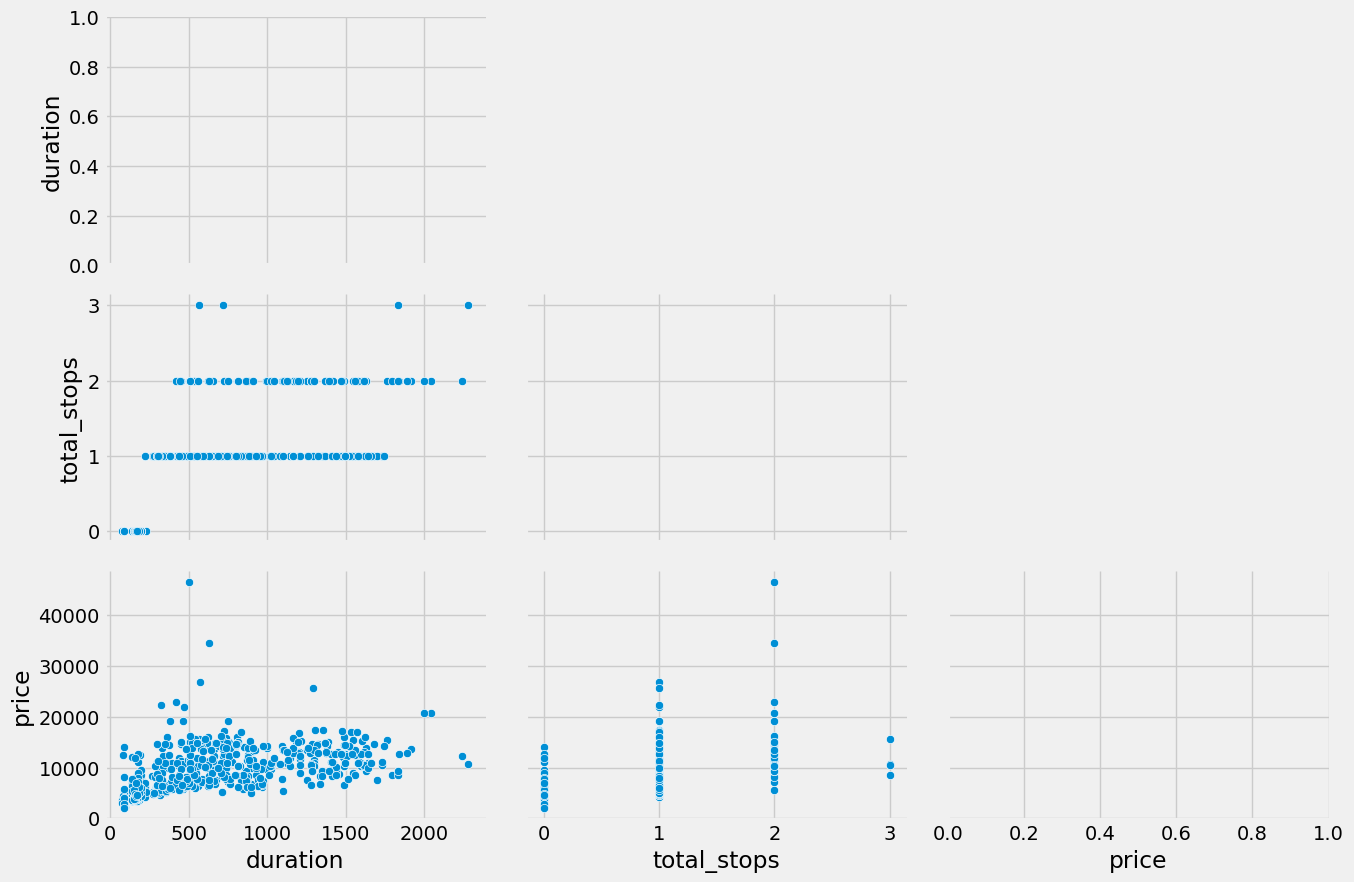

In [19]:
eda_helper_functions.pair_plots(train)

## 6. Correlation Analysis

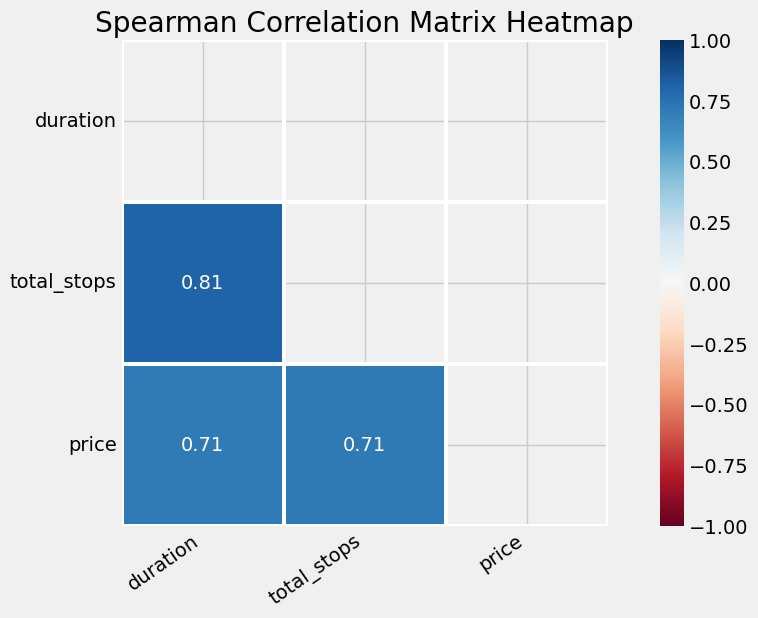

In [20]:
eda_helper_functions.correlation_heatmap(train)

In [21]:
train.corr(method="spearman", numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.805347,0.70613
total_stops,0.805347,1.000000,0.71267
price,0.706130,0.712670,1.00000


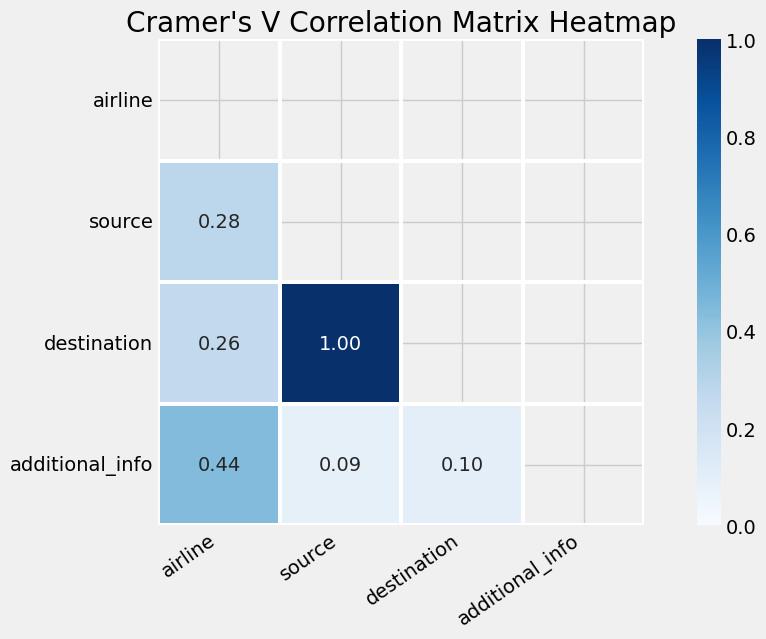

In [22]:
eda_helper_functions.cramersV_heatmap(train)

## 7. Detailed Analysis

In [23]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 7.1 Airline

In [24]:
train.airline

0                 Indigo
1            Jet Airways
2              Air India
3              Air India
4            Jet Airways
             ...        
635               Indigo
636          Jet Airways
637    Multiple Carriers
638          Jet Airways
639             Spicejet
Name: airline, Length: 640, dtype: object

In [25]:
train.airline.value_counts()

airline
Jet Airways          224
Indigo               120
Air India            111
Multiple Carriers     72
Spicejet              49
Vistara               33
Air Asia              21
Goair                 10
Name: count, dtype: int64

In [26]:
train.shape

(640, 10)

In [27]:
eda_helper_functions.cat_summary(train, "airline")

0                 Indigo
1            Jet Airways
2              Air India
3              Air India
4            Jet Airways
             ...        
635               Indigo
636          Jet Airways
637    Multiple Carriers
638          Jet Airways
639             Spicejet
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,224


,count,percentage
category,,
Jet Airways,224,0.350000
Indigo,120,0.187500
Air India,111,0.173437
Multiple Carriers,72,0.112500
Spicejet,49,0.076563
Vistara,33,0.051562
Air Asia,21,0.032813
Goair,10,0.015625


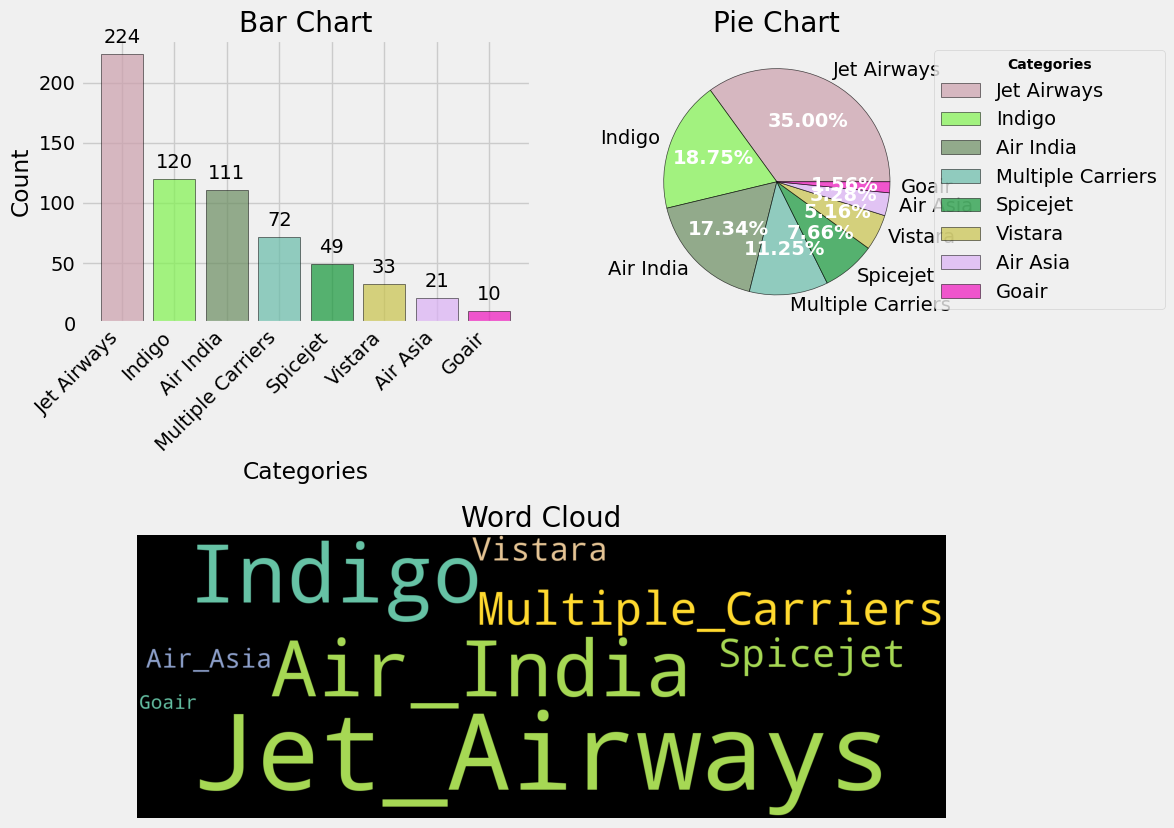

In [28]:
eda_helper_functions.cat_univar_plots(train, "airline")

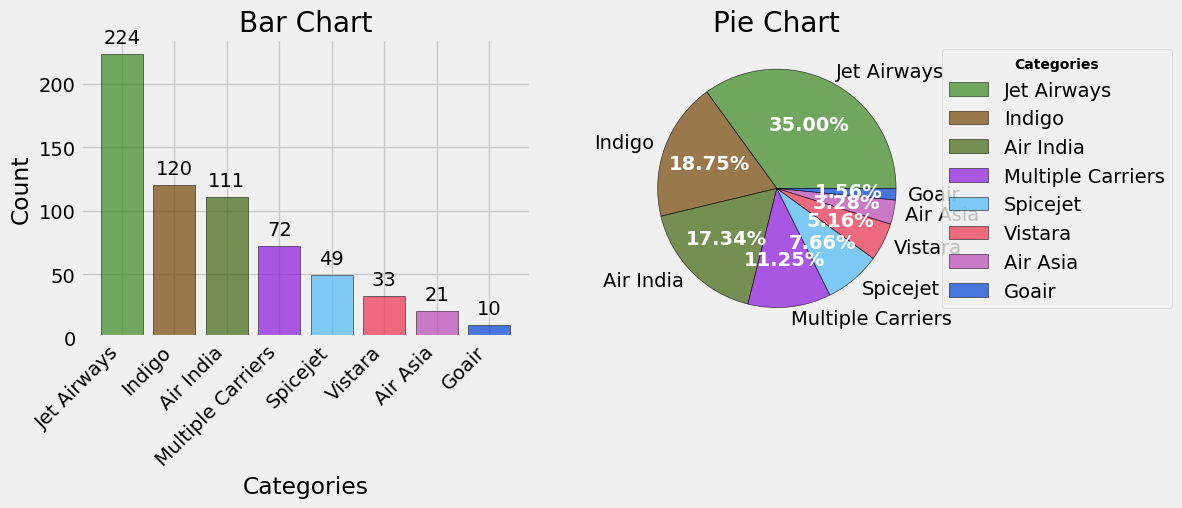

In [29]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False)

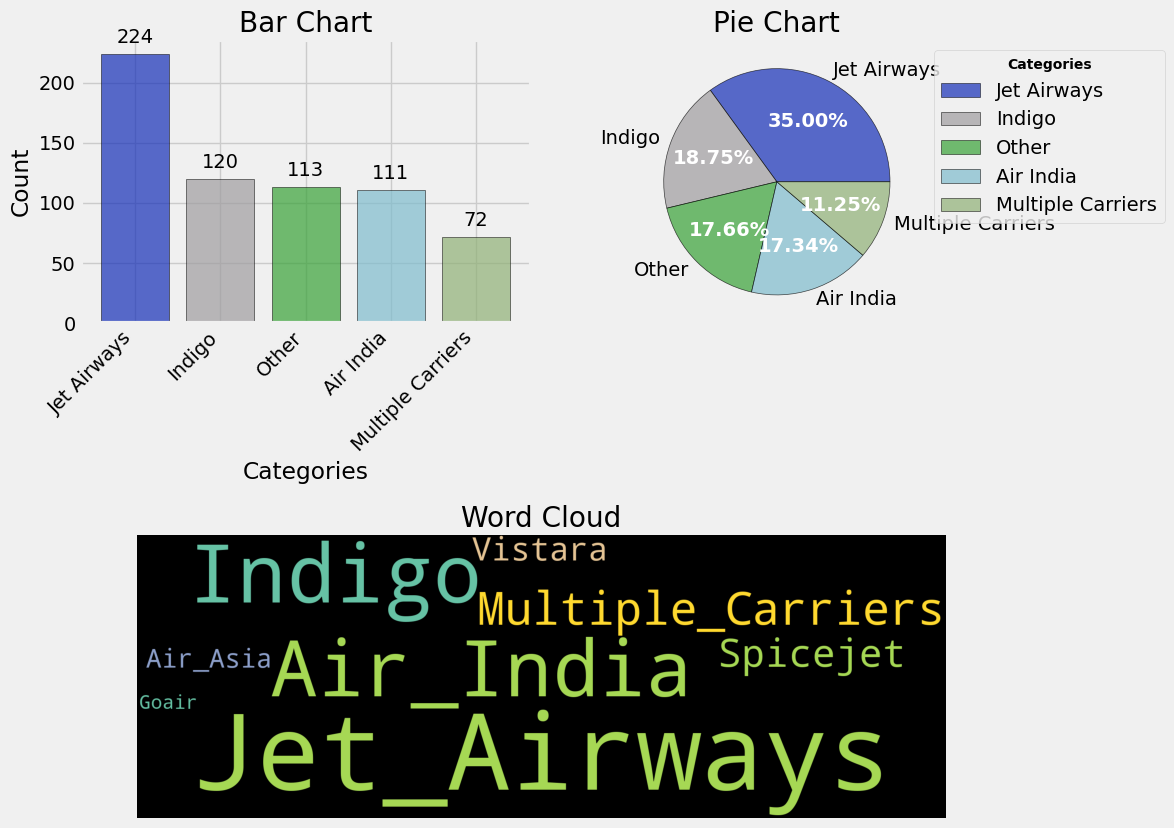

In [30]:
eda_helper_functions.cat_univar_plots(train, "airline", k=4)

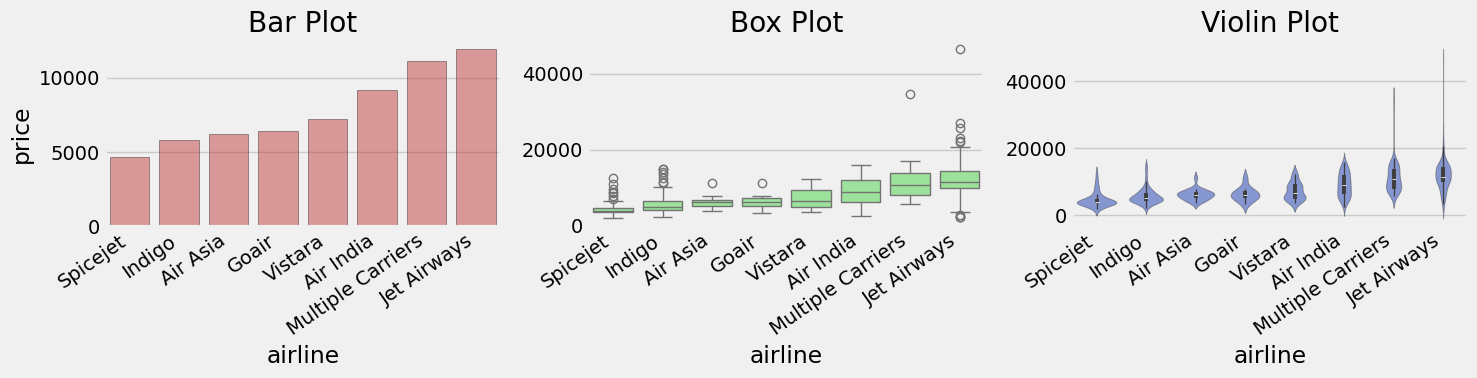

In [31]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [32]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

#### Hypothesis testing

In [33]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 49.11641910075725
- p-value              : 9.858537654561517e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 273.7401734343702
- p-value              : 2.4278310154472362e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


#### Multivariate analysis

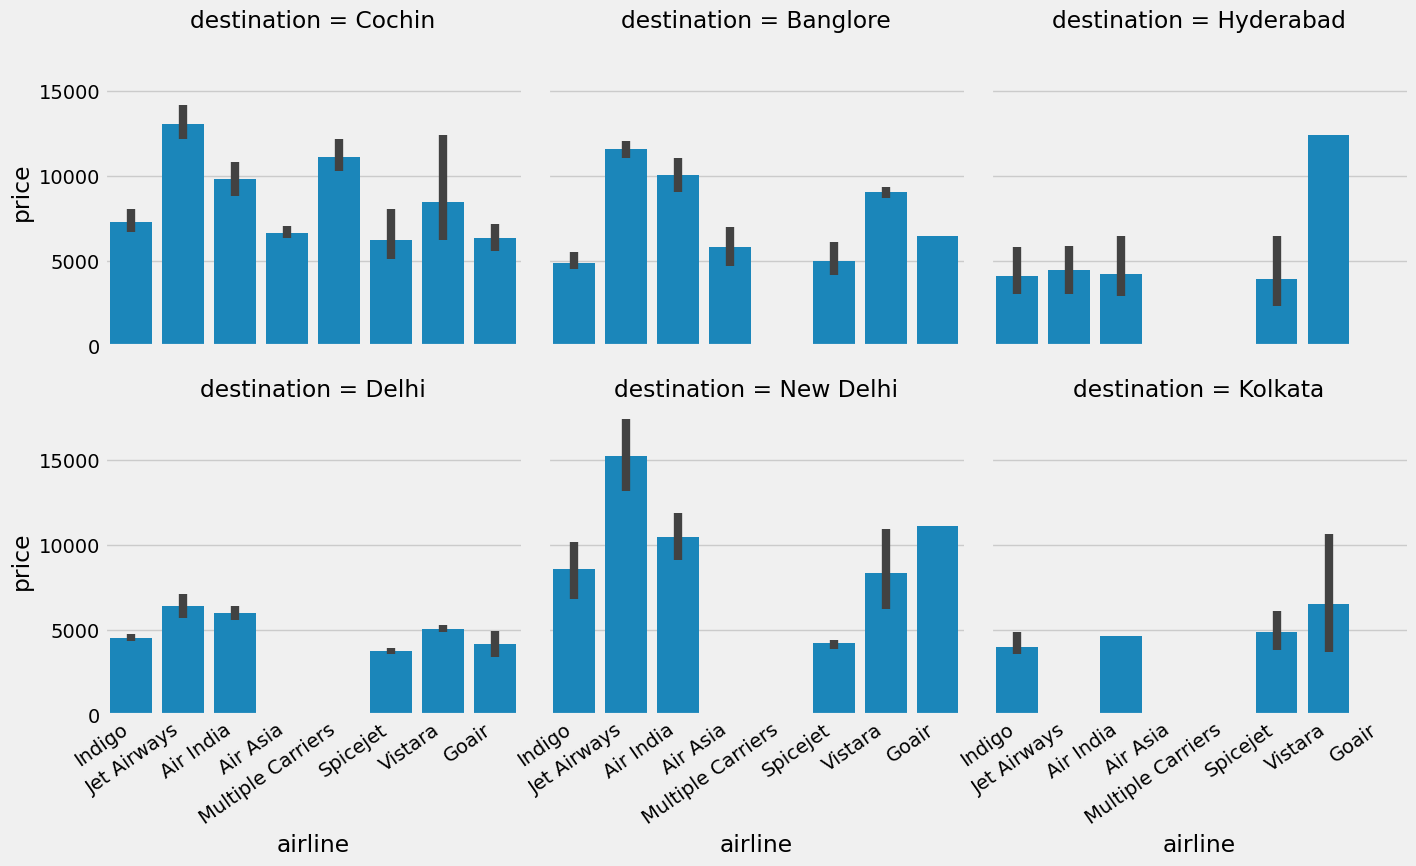

In [34]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

In [35]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 7.2 date_of_journey

In [36]:
train.date_of_journey

0     2019-03-03
1     2019-05-01
2     2019-06-06
3     2019-05-12
4     2019-04-01
         ...    
635   2019-06-03
636   2019-03-24
637   2019-06-12
638   2019-06-12
639   2019-04-15
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

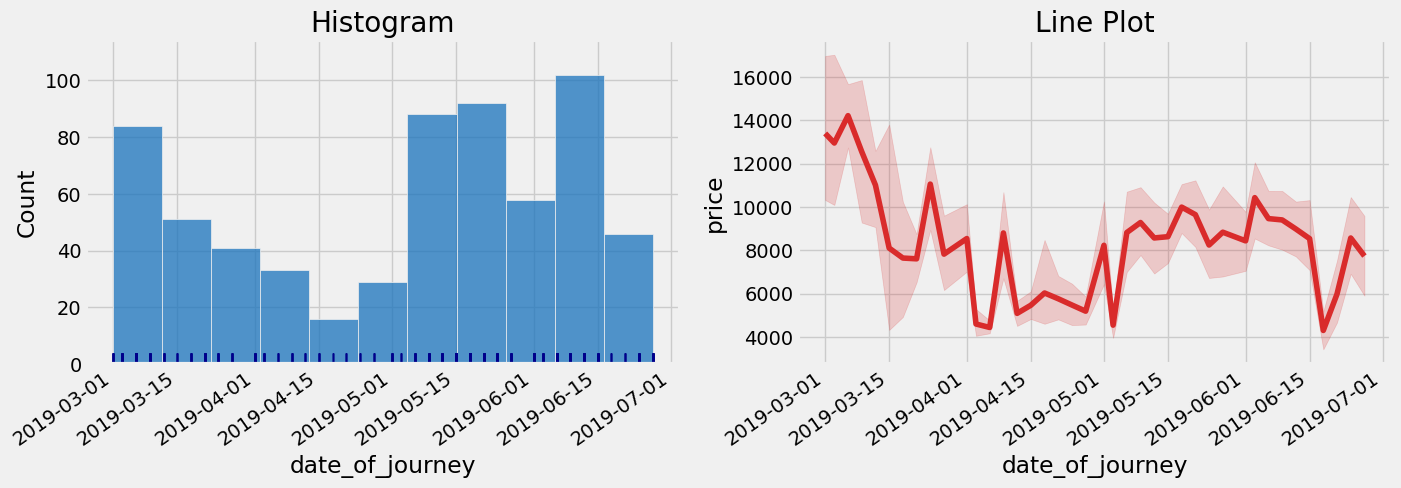

In [37]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

In [38]:
# per month average price
(
    train.
    groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
)

,price
month,
March,11228.367089
April,6350.423077
May,8968.588785
June,8744.036842


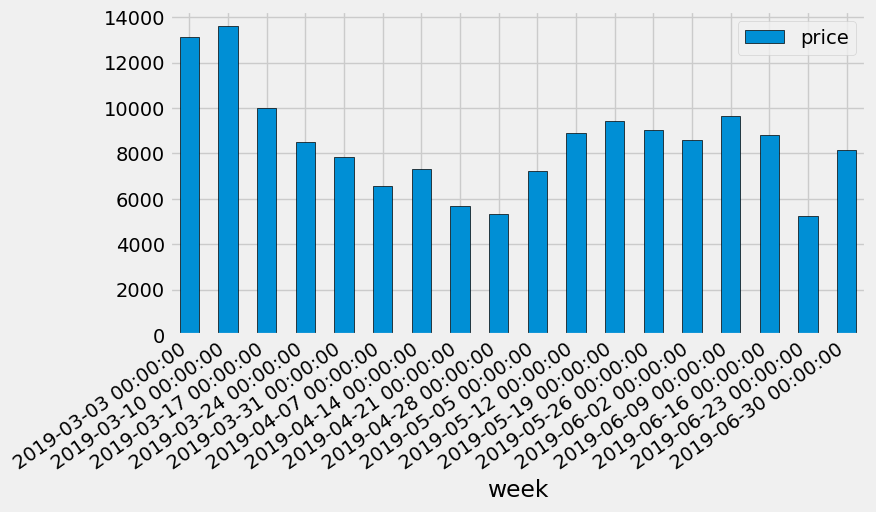

In [39]:
(
    train.
    groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    # .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="week")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

In [40]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
)

date_of_journey  source  
2019-03-31       Banglore    12043.683333
                 Chennai      5814.333333
                 Delhi       12855.433333
                 Kolkata      7864.434783
                 Mumbai       7151.888889
2019-04-30       Banglore     5103.250000
                 Delhi        7587.750000
                 Kolkata      6995.857143
                 Mumbai       2401.500000
2019-05-31       Banglore     4890.434783
                 Chennai      5353.428571
                 Delhi        9720.159420
                 Kolkata     10385.820000
                 Mumbai       4003.400000
2019-06-30       Banglore     5656.708333
                 Chennai      3592.800000
                 Delhi       10239.828829
                 Kolkata      8774.500000
                 Mumbai       3132.500000
Name: price, dtype: float64

In [41]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
)

source,Banglore,Chennai,Delhi,Kolkata,Mumbai
date_of_journey,,,,,
2019-03-31,12043.683333,5814.333333,12855.433333,7864.434783,7151.888889
2019-04-30,5103.250000,0.000000,7587.750000,6995.857143,2401.500000
2019-05-31,4890.434783,5353.428571,9720.159420,10385.820000,4003.400000
2019-06-30,5656.708333,3592.800000,10239.828829,8774.500000,3132.500000


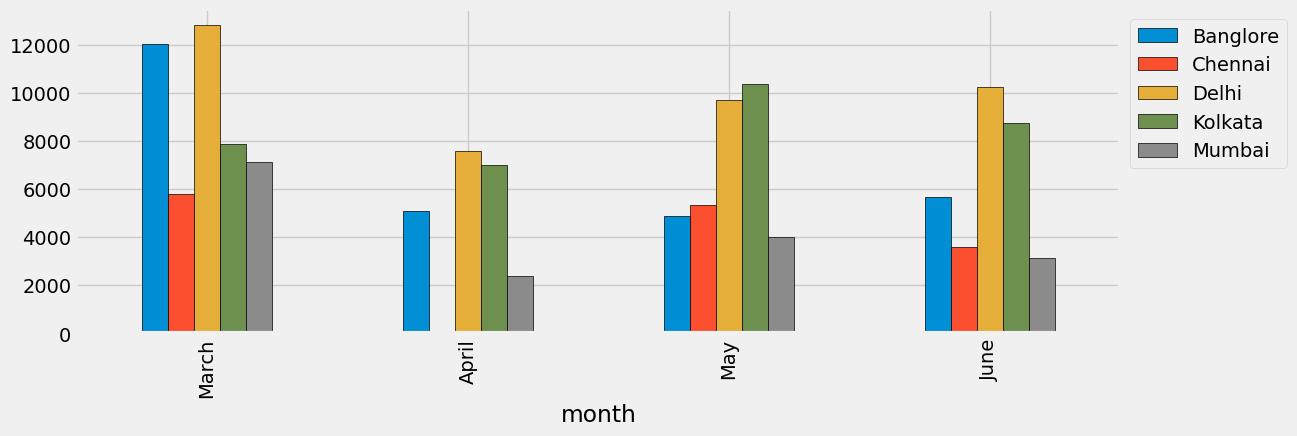

In [42]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12, 4),
        edgecolor="black"
    )
)

ax = plt.gca() # grab current axis

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1)
)


In [43]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 7.3 dep_time

In [44]:
train.dep_time

0     2024-07-13 21:05:00
1     2024-07-13 18:55:00
2     2024-07-13 06:20:00
3     2024-07-13 05:50:00
4     2024-07-13 20:25:00
              ...        
635   2024-07-13 23:30:00
636   2024-07-13 21:10:00
637   2024-07-13 10:00:00
638   2024-07-13 08:25:00
639   2024-07-13 15:45:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

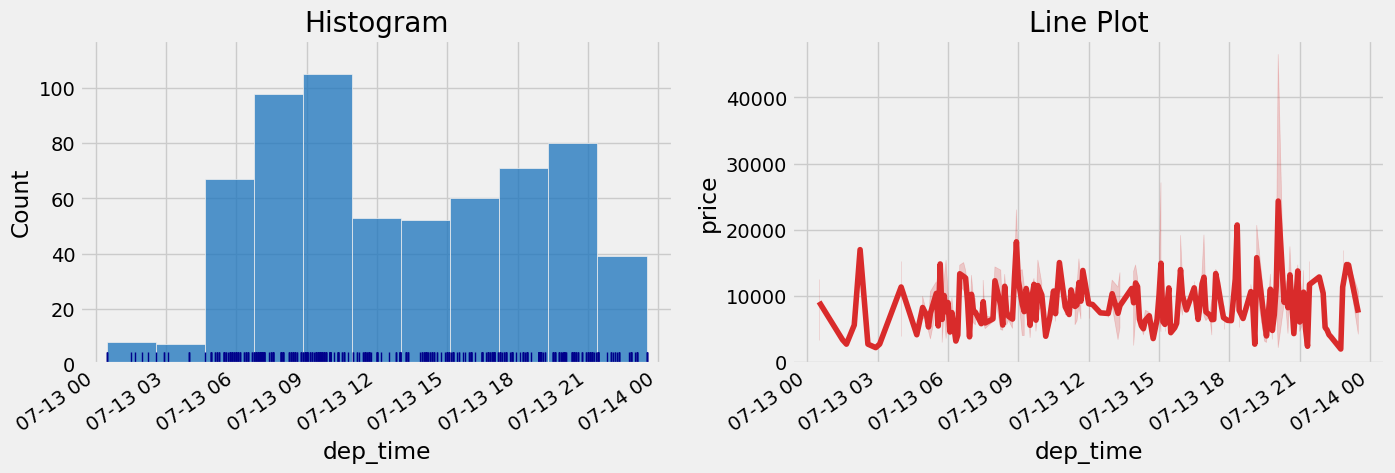

In [45]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

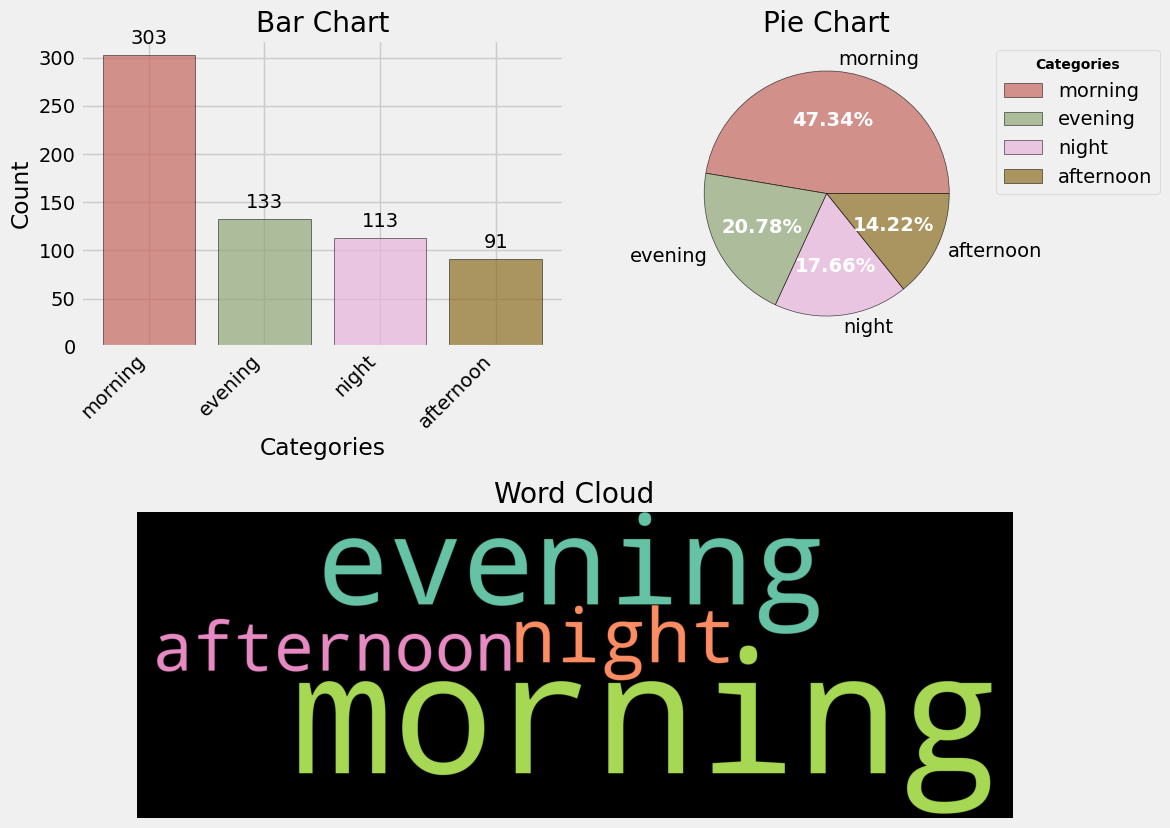

In [46]:
(
    train
    .assign(dep_time = lambda df_: (
            np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
                       df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                       df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
                       ["morning",
                       "afternoon",
                       "evening"],
                       default="night")
    ))
    .pipe(eda_helper_functions.cat_univar_plots, "dep_time")
)


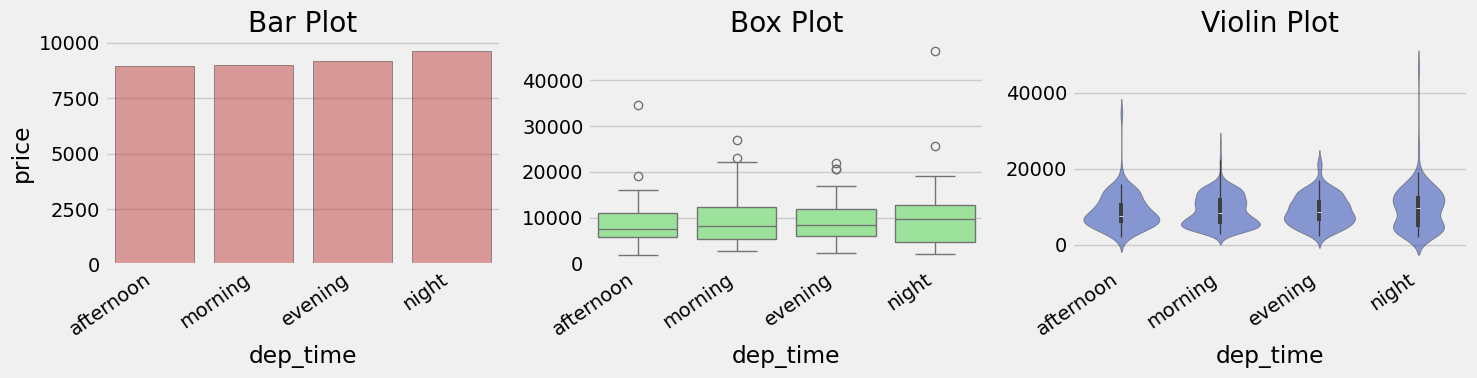

In [47]:
(
    train
    .assign(dep_time = lambda df_: (
            np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
                       df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                       df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
                       ["morning",
                       "afternoon",
                       "evening"],
                       default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [48]:
train.duration

0       195
1      1025
2        80
3       875
4       870
       ... 
635     305
636    1260
637     555
638     685
639     380
Name: duration, Length: 640, dtype: int64

In [51]:
eda_helper_functions.num_summary(train, "duration")

0       195
1      1025
2        80
3       875
4       870
       ... 
635     305
636    1260
637     555
638     685
639     380
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,150.00
25,175.00
50,505.00
75,926.25
90,1450.50
95,1595.00
99,1836.10


,value
mean,637.718750
trimmed mean (5%),606.657986
trimmed mean (10%),579.062500
median,505.000000


,value
var,248304.803404
std,498.301920
IQR,751.250000
mad,335.000000
coef_variance,0.781382


,value
skewness,0.826355
kurtosis,-0.340098


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 5.02711750737907e-21
Test Statistic       : 0.8891901029678078
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 23.690540315151907
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [52]:
eda_helper_functions.num_summary(train, "duration")

0       195
1      1025
2        80
3       875
4       870
       ... 
635     305
636    1260
637     555
638     685
639     380
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,150.00
25,175.00
50,505.00
75,926.25
90,1450.50
95,1595.00
99,1836.10


,value
mean,637.718750
trimmed mean (5%),606.657986
trimmed mean (10%),579.062500
median,505.000000


,value
var,248304.803404
std,498.301920
IQR,751.250000
mad,335.000000
coef_variance,0.781382


,value
skewness,0.826355
kurtosis,-0.340098


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 5.02711750737907e-21
Test Statistic       : 0.8891901029678078
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 23.690540315151907
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


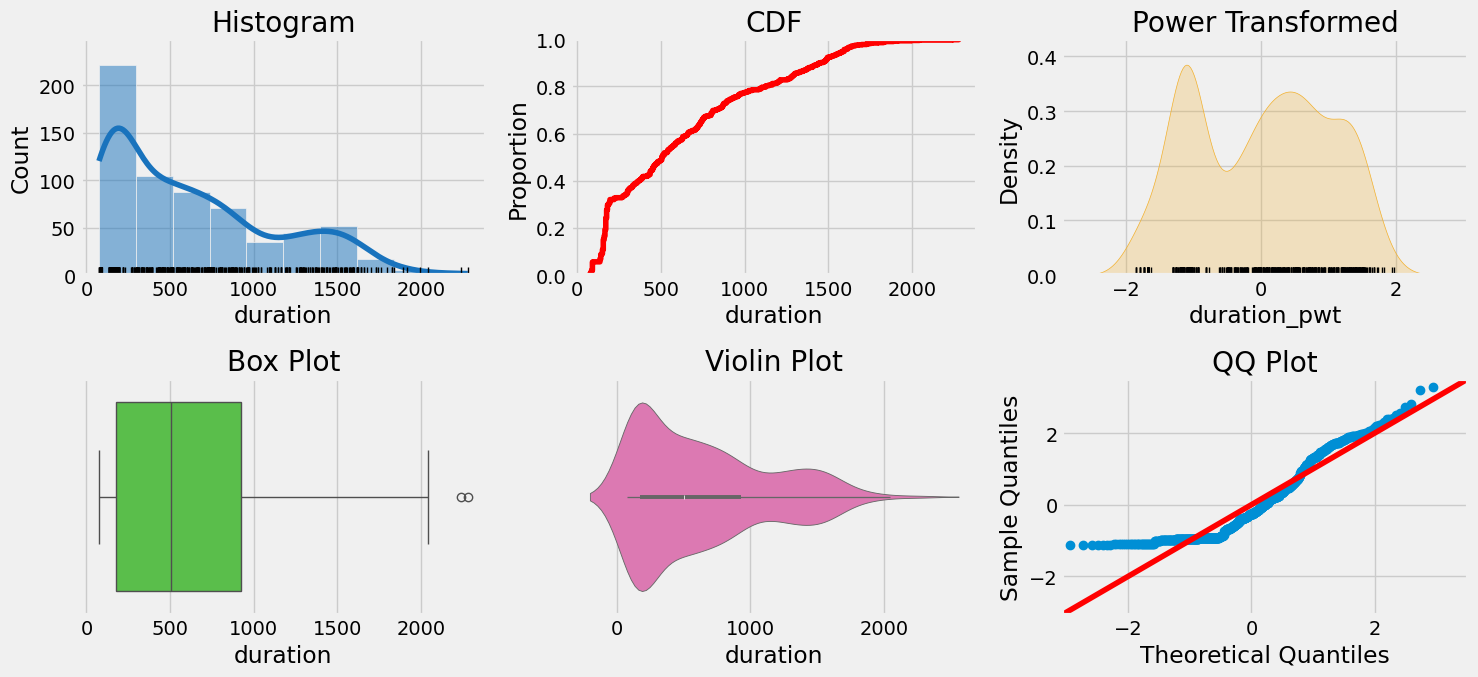

In [53]:
eda_helper_functions.num_univar_plots(train, "duration")

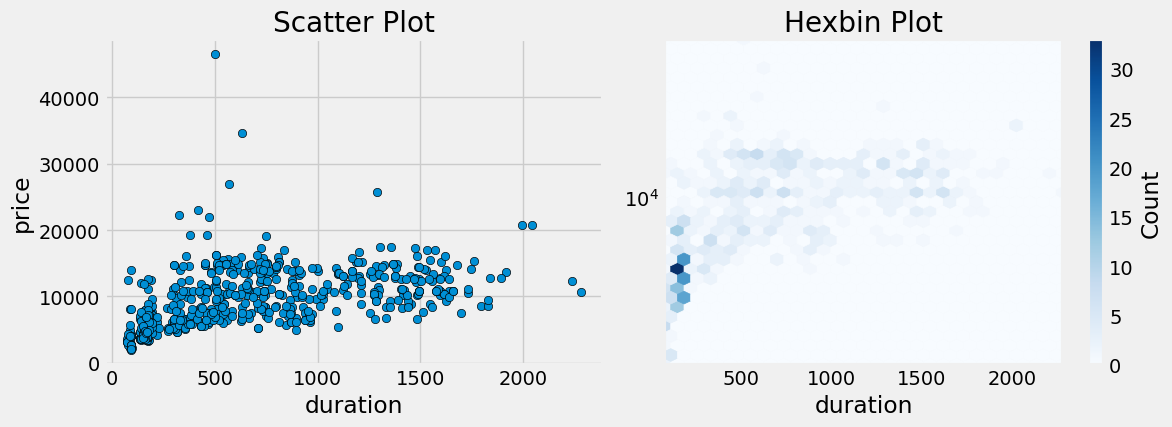

In [54]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=30,
        cmap="Blues"
    )
)

In [55]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5307934366831865
- p-value              : 8.438293011935537e-48
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7061304344755953
- p-value              : 1.0069715518507206e-97
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


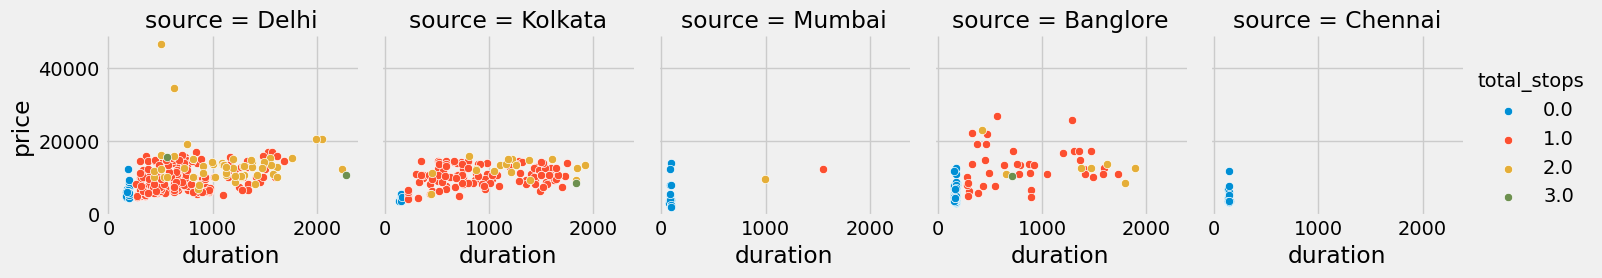

In [60]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()